In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

df= pd.read_csv('/Users/ahalfon/Desktop/IDS/Project 1/movieReplicationSet.csv')

ratings_df= df.iloc[:,:400]

self_assessments_df= df.iloc[:,400:420]

personality_df= df.iloc[:,420:464]

experience_ratings_df= df.iloc[:,464:474]

gender_identity_df= df.iloc[:,474]

only_child_df= df.iloc[:,475]

enjoys_alone_df= df.iloc[:,476]

1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that
are less popular?

U Statistic: 1242808144.5, P-value: 0.0
Ratings of more popular movies are  significantly higher than those of less popular movies.


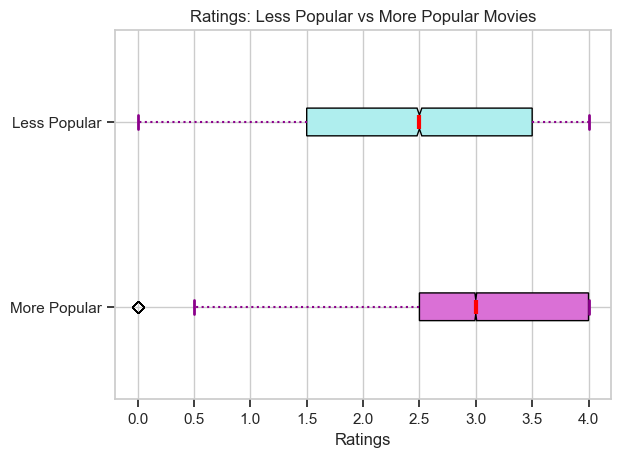

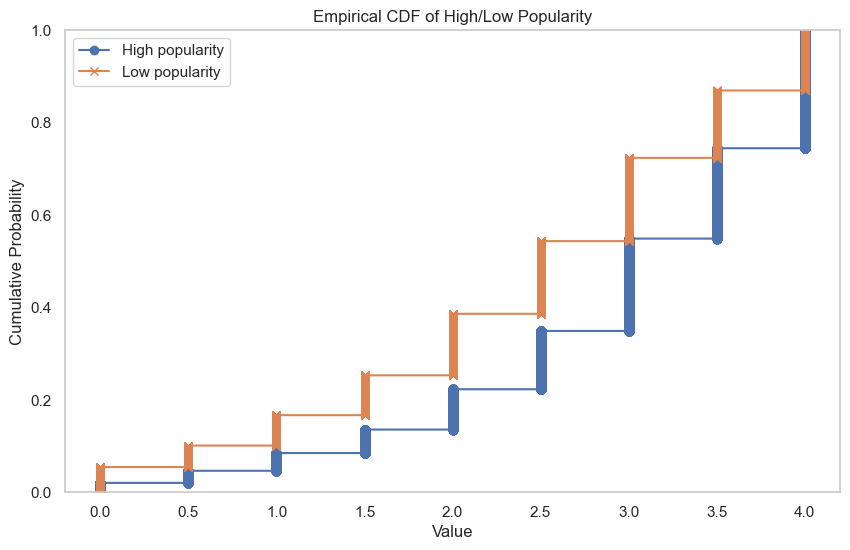

In [43]:
# Implementing median split
median_rating = ratings_df.count().median()  # Assuming more ratings means higher popularity
high_popularity_movies = (ratings_df.loc[:, ratings_df.count() >= median_rating]).reset_index(drop=True)
low_popularity_movies = (ratings_df.loc[:, ratings_df.count() < median_rating]).reset_index(drop=True)

# Dropping NaN values
high_popularity_cleaned = []
for column in high_popularity_movies.columns:
    ratings = pd.to_numeric(high_popularity_movies[column].dropna(), errors='coerce')
    high_popularity_cleaned.extend(ratings.dropna().values)

low_popularity_cleaned = []
for column in low_popularity_movies.columns:
    ratings = pd.to_numeric(low_popularity_movies[column].dropna(), errors='coerce')
    low_popularity_cleaned.extend(ratings.dropna().values)

# Performing Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(high_popularity_cleaned, low_popularity_cleaned,alternative='greater')

# Results
print(f'U Statistic: {statistic}, P-value: {p_value}')

# Significance
if p_value < 0.005:
    print("Ratings of more popular movies are significantly higher than those of less popular movies.")
else:
    print("Rating of more popular movies are not significantly higher than those of less popular movies.")

# Visualizations

popular_combinedData = np.transpose(np.array([high_popularity_cleaned,low_popularity_cleaned],dtype=object))

fig = plt.figure()
ax = fig.add_subplot(111)

bp = ax.boxplot(popular_combinedData, patch_artist = True,
                notch ='True', vert = 0)
colors = ['orchid', 'paleturquoise']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

ax.set_yticklabels(['More Popular', 'Less Popular'])
plt.title("Ratings: Less Popular vs More Popular Movies")
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Ratings')

plt.show()


# Plot the distributions
plt.figure(figsize=(10, 6))

# Plot CDFs
sns.ecdfplot(high_popularity_cleaned, label='High popularity', marker='o', stat="proportion")
sns.ecdfplot(low_popularity_cleaned, label='Low popularity', marker='x', stat="proportion")

plt.title('Empirical CDF of High/Low Popularity')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()


2) Are movies that are newer rated differently than movies that are older?

U Statistic: 1553577699.0
P-value: 1.2849216001533932e-06
There is a significant difference in the ratings of newer and older movies.


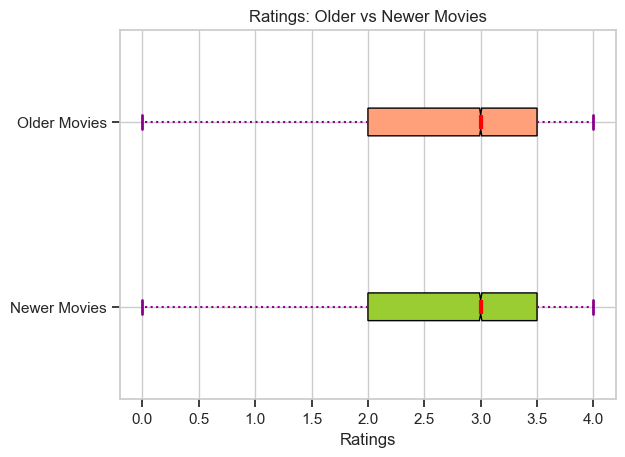

In [97]:
# Getting years index
years = ratings_df.columns.str.extract(r'\((\d{4})\)', expand=False).astype(int)
title_transposed_df = ratings_df.copy().transpose()
title_transposed_df['years'] = years
title_transposed_df.reset_index(inplace=True)

# Implementing median split 
median_year = title_transposed_df['years'].median()
newer_movies_df = title_transposed_df[title_transposed_df['years'] >= median_year]
older_movies_df = title_transposed_df[title_transposed_df['years'] < median_year]

# Dropping 'Years' column
new_movies_df = newer_movies_df.drop(columns=['years'])
old_movies_df = older_movies_df.drop(columns=['years'])

# Dropping NaN values in each column 
new_movies_cleaned = []
for column in new_movies_df.columns:
    ratings = pd.to_numeric(new_movies_df[column].dropna(), errors='coerce')
    new_movies_cleaned.extend(ratings.dropna().values)  # Only valid ratings

old_movies_cleaned = []
for column in old_movies_df.columns:
    ratings = pd.to_numeric(old_movies_df[column].dropna(), errors='coerce')
    old_movies_cleaned.extend(ratings.dropna().values)  # Only valid ratings

# Converting to numpy arrays
new_movies_cleaned = np.array(new_movies_cleaned)
old_movies_cleaned = np.array(old_movies_cleaned)

# Performing Mann Whitney U test
statistic, p_value = stats.mannwhitneyu(new_movies_cleaned, old_movies_cleaned)

# Results
print(f"U Statistic: {statistic}")
print(f"P-value: {p_value}")

# Significance
alpha = 0.005
if p_value < alpha:
    print("There is a significant difference in the ratings of newer and older movies.")
else:
    print("There is no significant difference in the ratings of newer and older movies.")

# Visualizations

popular_combinedData = np.transpose(np.array([old_movies_cleaned,new_movies_cleaned],dtype=object))

fig = plt.figure()
ax = fig.add_subplot(111)

bp = ax.boxplot(popular_combinedData, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['yellowgreen', 'lightsalmon']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

ax.set_yticklabels(['Newer Movies', 'Older Movies'])
plt.title("Ratings: Older vs Newer Movies")
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Ratings')
plt.show()

3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

U Statistic: 96830.5, P-value: 0.050536625925559006
There is no significant difference in the ratings of male and female viewers for 'Shrek (2001)'


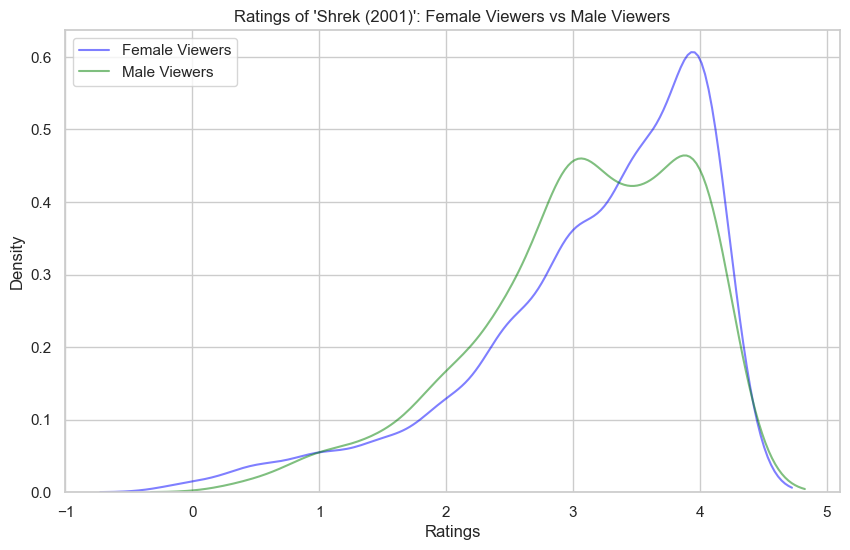

In [93]:
# Extracting 'Shrek 2001' ratings
shrek_ratings= ratings_df['Shrek (2001)']

# Merging dfs
merged_shrek_gender_df = pd.concat([gender_identity_df, shrek_ratings], axis=1)

# Extracting male and female ratings for 'Shrek (2001)'
female_shrek_ratings = merged_shrek_gender_df[merged_shrek_gender_df.iloc[:,0] == 1]['Shrek (2001)']
male_shrek_ratings = merged_shrek_gender_df[merged_shrek_gender_df.iloc[:,0] == 2]['Shrek (2001)']

# Dropping NaN values for male and female ratings
female_shrek_cleaned = female_shrek_ratings.dropna()
male_shrek_cleaned = male_shrek_ratings.dropna()

# Performing Mann Whitney U test
statistic, p_value = stats.mannwhitneyu(female_shrek_cleaned, male_shrek_cleaned)

# Results
print(f"U Statistic: {statistic}, P-value: {p_value}")

# Significance
if p_value < 0.005:
    print("There is a significant difference in the ratings of male and female viewers for 'Shrek (2001)'")
else:
    print("There is no significant difference in the ratings of male and female viewers for 'Shrek (2001)'")

# Visualizations

# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(female_shrek_cleaned, label='Female Viewers', color='blue', fill=False, alpha=0.5)
sns.kdeplot(male_shrek_cleaned, label='Male Viewers', color='green', fill=False, alpha=0.5)
plt.title("Ratings of 'Shrek (2001)': Female Viewers vs Male Viewers")
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


4) What proportion of movies are rated differently by male and female viewers?

In [91]:
# Mergings dfs
merged_gender_ratings_df= pd.concat([gender_identity_df, ratings_df], axis=1)

# Extracting female and male ratings
female= merged_gender_ratings_df[merged_gender_ratings_df.iloc[:,0]==1]
male= merged_gender_ratings_df[merged_gender_ratings_df.iloc[:,0]==2]

# Dropping self-identification column
female_ratings_df=female.drop(female.columns[0],axis=1).reset_index(drop=True)
male_ratings_df=male.drop(male.columns[0],axis=1).reset_index(drop=True)

# Dropping NaN values
female_ratings_cleaned = {}
# Iterating through each column (movie)
for column in female_ratings_df.columns:
    # Dropping NaN values in the current column
    # Storing cleaned ratings in a dictionary
    female_ratings_cleaned[column] = female_ratings_df[column].dropna()

male_ratings_cleaned={}
for column in male_ratings_df.columns:
    male_ratings_cleaned[column] = male_ratings_df[column].dropna()

#print(male_ratings_cleaned)
#print(female_ratings_cleaned)

results=[]
significant=[]

# Iterating through each column (movie)
for movie in female_ratings_df.keys():
    
    # Extracting ratings 
    female_vals = female_ratings_cleaned[movie]
    male_vals = male_ratings_cleaned[movie]

    # Performing Mann Whitney U test for each movie
    statistic, p_value = stats.mannwhitneyu(female_vals, male_vals)

    # Storing the results
    results.append((movie, statistic, p_value))

    # Identifying significant results
    if p_value < 0.005:
        significant.append((movie,statistic,p_value))

# Calculating proportion
num_significant = len(significant)
num_movies= len(results)
effect_proportion = (num_significant / num_movies)*100

# Printing proportion 
print(f"{effect_proportion}""% of movies (or "f"{num_significant}/{num_movies}"") are rated differently by male and female viewers.")

# Printing movies that had significant result
print("\nMovies that exhibited significant difference:\n")
for movie, statistic, p_value in significant:
    print('\t',f"{movie}: U statistic= {statistic}, p-value = {p_value}")

# Printing complete results
print('\nComplete Results:\n')
for movie, statistic, p_value in results:
    print('\t',f"{movie}: U statistic= {statistic}, p-value = {p_value}")


12.5% of movies (or 50/400) are rated differently by male and female viewers.

Movies that exhibited significant difference:

	 Django Unchained (2012): U statistic= 17761.0, p-value = 0.00015542426769271815
	 Alien (1979): U statistic= 6817.0, p-value = 6.542170586924406e-05
	 Fargo (1996): U statistic= 5461.5, p-value = 0.003309364169873757
	 Star Wars: Episode IV - A New Hope (1977): U statistic= 26577.0, p-value = 0.0016660989681143768
	 Indiana Jones and the Raiders of the Lost Ark (1981): U statistic= 10432.5, p-value = 0.0013879291097348139
	 The Lost World: Jurassic Park (1997): U statistic= 26028.5, p-value = 0.004065865964755651
	 13 Going on 30 (2004): U statistic= 29167.5, p-value = 6.916495846569324e-06
	 Inglorious Bastards (2009): U statistic= 16914.0, p-value = 0.0016227471622817877
	 Clueless (1995): U statistic= 24036.0, p-value = 0.0012542980225539132
	 The Exorcist (1973): U statistic= 12997.0, p-value = 0.000554106476103341
	 Pirates of the Caribbean: Dead Man's Ch

5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

U Statistic: 52929.0, P-value: 0.978419092554931
Ratings of only children for ‘The Lion King (1994)’ are not signficantly higher than those of not only children.


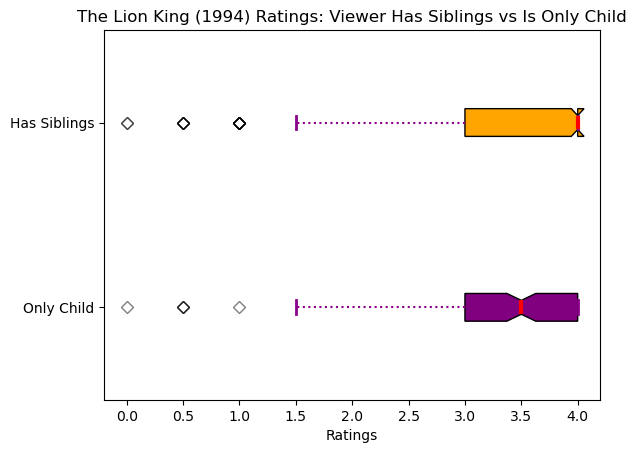

In [26]:
# Extracting ratings for 'The Lion King (1994'
lionking_ratings= ratings_df['The Lion King (1994)']

# Merging dfs
merged_lionking_df = pd.concat([only_child_df, lionking_ratings], axis=1)

# Extracting ratings for only children and not only children
onlychild_lkrate = merged_lionking_df[merged_lionking_df.iloc[:,0] == 1]['The Lion King (1994)']
sibling_lkrate = merged_lionking_df[merged_lionking_df.iloc[:,0] == 0]['The Lion King (1994)']

# Dropping NaN values
only_child_ratings_cleaned= onlychild_lkrate.dropna()
not_only_child_ratings_cleaned= sibling_lkrate.dropna()

# Performing Mann Whitney U test
statistic, p_value= stats.mannwhitneyu(only_child_ratings_cleaned, not_only_child_ratings_cleaned,alternative='greater')

# Results
print(f"U Statistic: {statistic}, P-value: {p_value}")

# Significance
if p_value < 0.005:
    print("Ratings of only children for ‘The Lion King (1994)’ are signficantly higher than those of not only children.")
else:
    print("Ratings of only children for ‘The Lion King (1994)’ are not signficantly higher than those of not only children.")

# Visualizations

lion_combinedData = np.transpose(np.array([only_child_ratings_cleaned,not_only_child_ratings_cleaned],dtype=object))

fig = plt.figure()
ax = fig.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(lion_combinedData, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['purple', 'orange']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Only Child', 'Has Siblings'])
 
# Adding title
plt.title("The Lion King (1994) Ratings: Viewer Has Siblings vs Is Only Child")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Ratings')
# show plot
plt.show()

6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings
vs. those without?

1.7500000000000002% of movies (or 7/400) exhibit an 'only child' effect

Movies that exhibit 'only child' effect:

	 Billy Madison (1995): U statistic= 3226.5, p-value = 0.0005383987317092497
	 The Blue Lagoon (1980): U statistic= 1200.5, p-value = 0.0021346953003846527
	 Happy Gilmore (1996): U statistic= 3196.5, p-value = 0.0010748032713519967
	 American Pie (1999): U statistic= 10903.0, p-value = 0.00416798443480679
	 Star Wars: Episode VI - The Return of the Jedi (1983): U statistic= 10705.0, p-value = 0.0033458769641976993
	 FeardotCom (2002): U statistic= 123.0, p-value = 0.004603506277083965
	 Captain America: Civil War (2016): U statistic= 18403.5, p-value = 0.0037359441415383094

Complete Results:

	 The Life of David Gale (2003): U statistic= 452.0, p-value = 0.8410669691065599
	 Wing Commander (1999): U statistic= 421.5, p-value = 0.8133639930027994
	 Django Unchained (2012): U statistic= 11920.0, p-value = 0.0435271281226858
	 Alien (1979): U statistic= 5420.5, p-value = 0.

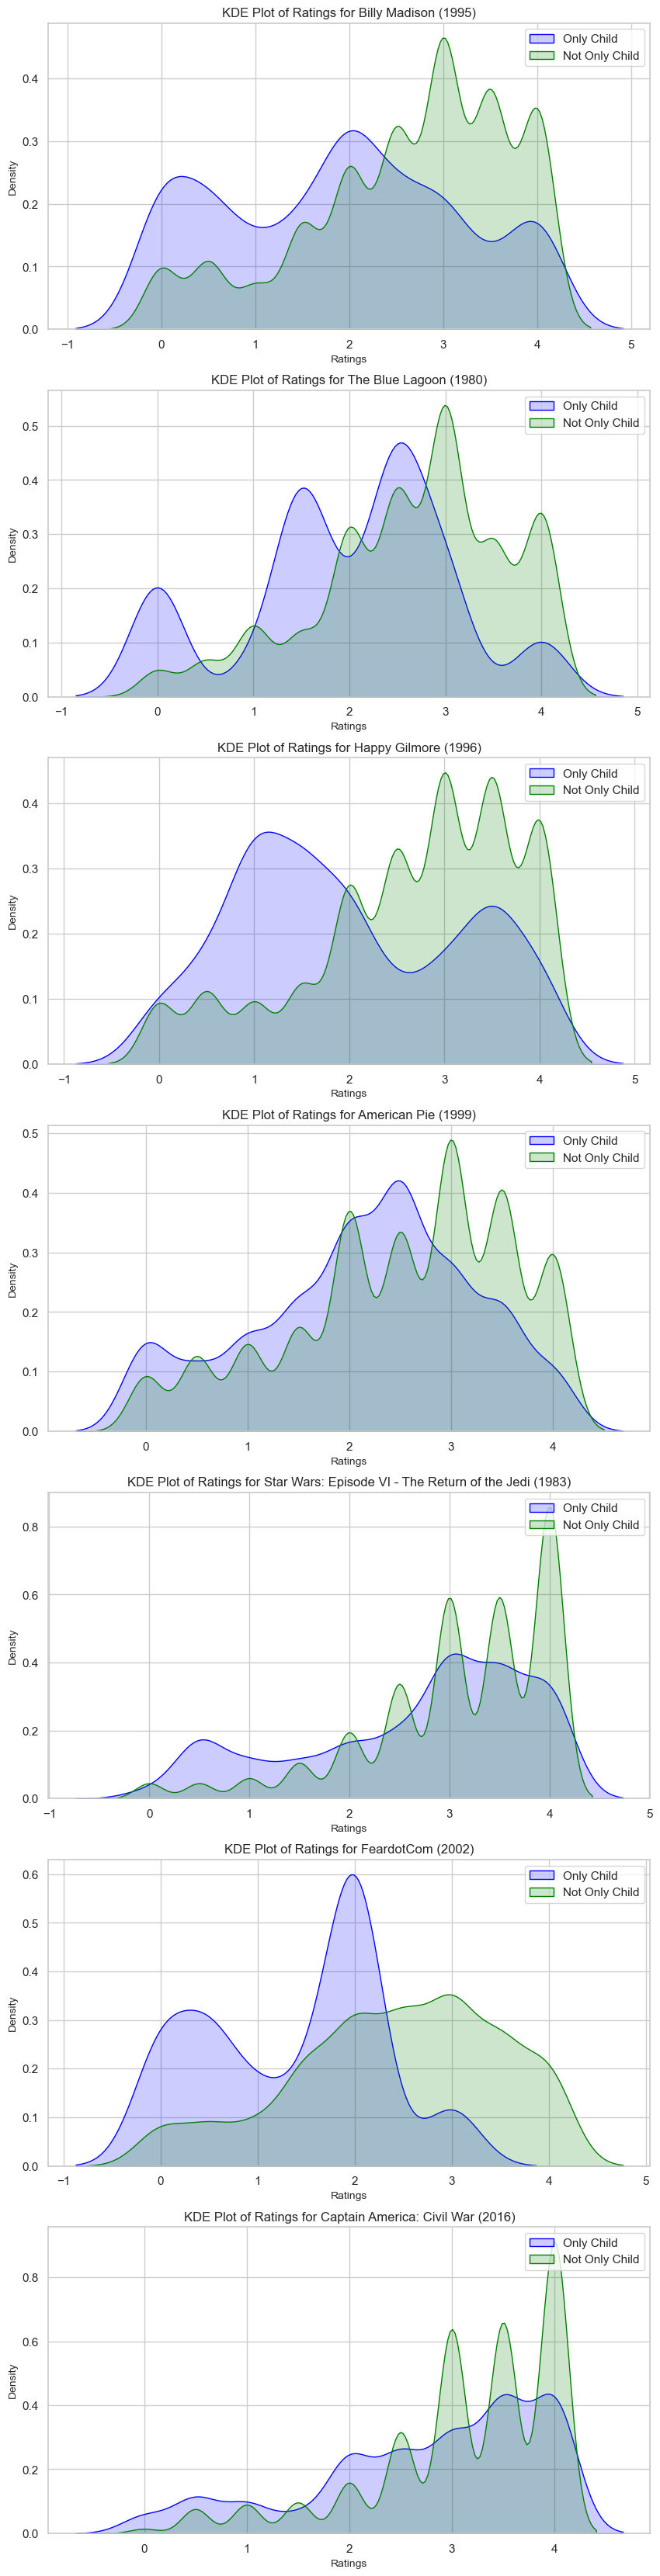

In [89]:
# Merging dfs
merged_siblings_ratings_df= pd.concat([only_child_df, ratings_df], axis=1)

# Extracting ratings for only children and not only children
only_child= merged_siblings_ratings_df[merged_siblings_ratings_df.iloc[:,0]==1]
not_only_child= merged_siblings_ratings_df[merged_siblings_ratings_df.iloc[:,0]==0]

# Dropping self-assessment column
only_child_ratings= only_child.drop(only_child.columns[0],axis=1).reset_index(drop=True)
not_only_child_ratings= not_only_child.drop(not_only_child.columns[0],axis=1).reset_index(drop=True)

# Dropping NaN values
only_child_cleaned = {}
# Iterating through each column (movie)
for column in only_child_ratings.columns:
    # Dropping NaN values in the current column
    # Storing cleaned ratings in a dictionary
    only_child_cleaned[column] = only_child_ratings[column].dropna()

not_only_child_cleaned={}
for column in not_only_child_ratings.columns:
    not_only_child_cleaned[column] = not_only_child_ratings[column].dropna()

#print(only_child_cleaned)
#print(not_only_child_cleaned)

results=[]
significant=[]

# Iterating through each column (movie)
for movie in only_child_ratings.keys():
    
    # Extracting ratings 
    only_child_vals = only_child_cleaned[movie]
    not_only_child_vals = not_only_child_cleaned[movie]
    
    # Performing Mann Whitney U test for each movie
    statistic, p_value = stats.mannwhitneyu(only_child_vals, not_only_child_vals)

    # Storing the results
    results.append((movie, statistic, p_value))

    # Identifying significant results
    if p_value < 0.005:
        significant.append((movie,statistic,p_value))

# Calculating proportion
num_significant = len(significant)
num_movies= len(results)
effect_proportion = (num_significant / num_movies)*100

# Printing proportion 
print(f"{effect_proportion}""% of movies (or "f"{num_significant}/{num_movies}"") exhibit an 'only child' effect")

# Printing movies that had significant result
print("\nMovies that exhibit 'only child' effect:\n")
for movie, statistic, p_value in significant:
    print('\t',f"{movie}: U statistic= {statistic}, p-value = {p_value}")

# Printing complete results
print('\nComplete Results:\n')
for movie, statistic, p_value in results:
    print('\t',f"{movie}: U statistic= {statistic}, p-value = {p_value}")

# Visualizations for significant movies

sns.set(style="whitegrid")

num_significant = len(significant)

fig, axes = plt.subplots(num_significant, 1, figsize=(10, 6 * num_significant))

for ax, (movie, _, _) in zip(axes, significant):
    only_child_vals = only_child_cleaned[movie]
    not_only_child_vals = not_only_child_cleaned[movie]

    sns.kdeplot(only_child_vals, ax=ax, label='Only Child', bw_adjust=0.5, fill=True, alpha=0.2, color='blue')
    sns.kdeplot(not_only_child_vals, ax=ax, label='Not Only Child', bw_adjust=0.5, fill=True, alpha=0.2, color='green')

    ax.set_title(f'KDE Plot of Ratings for {movie}', fontsize=12)
    ax.set_xlabel('Ratings', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.legend()
    ax.grid(True)

7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who
prefer to watch them alone?

U Statistic: 49303.5, P-value: 0.9436657996253056
Those who prefer to watch movies socially do not rate 'The Wolf of Wall Street (2013)' significantly higher than those who prefer to watch alone.


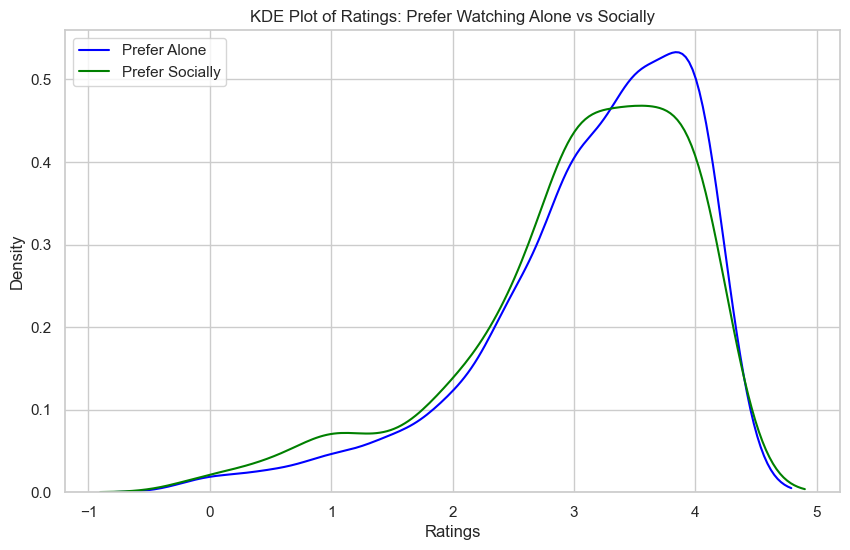

In [128]:
# Extracting ratings for 'The Wolf of Wall Street (2013)'
wws_ratings= ratings_df['The Wolf of Wall Street (2013)']

# Merging dfs
merged_wws_df = pd.concat([enjoys_alone_df, wws_ratings], axis=1)

# Creating new dfs for those who prefer to watch alone and those who prefer to watch socially
prefers_alone_wws = merged_wws_df[merged_wws_df.iloc[:,0] == 1]['The Wolf of Wall Street (2013)']
prefers_socially_wws = merged_wws_df[merged_wws_df.iloc[:,0] == 0]['The Wolf of Wall Street (2013)']

# Dropping NaN values
prefers_alone_wws= prefers_alone_wws.dropna()
prefers_socially_wws= prefers_socially_wws.dropna()

# Performing Mann Whitney U test
statistic,p_value= stats.mannwhitneyu(prefers_socially_wws,prefers_alone_wws,alternative='greater')

# Results
print(f"U Statistic: {statistic}, P-value: {p_value}")

# Significance 
if p_value < 0.005:
    print("Those who prefer to watch movies socially rate 'The Wolf of Wall Street (2013)' significantly higher than those who prefer to watch alone.")
else:
    print("Those who prefer to watch movies socially do not rate 'The Wolf of Wall Street (2013)' significantly higher than those who prefer to watch alone.")

# Visualizations

plt.figure(figsize=(10, 6))

sns.kdeplot(prefers_alone_wws, label='Prefer Alone', color='blue', fill=False)
sns.kdeplot(prefers_socially_wws, label='Prefer Socially', color='green', fill=False)

plt.title('KDE Plot of Ratings: Prefer Watching Alone vs Socially')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

8) What proportion of movies exhibit such a “social watching” effect?

2.5% of movies (or 10/400) exhibit a 'social watching' effect

Movies that exhibit 'social watching' effect:

	 The Silence of the Lambs (1991): U statistic= 24344.5, p-value = 0.0005543299564219372
	 North (1994): U statistic= 942.0, p-value = 0.0046956853561537105
	 Inglorious Bastards (2009): U statistic= 18197.0, p-value = 0.004998203056515189
	 Shrek 2 (2004): U statistic= 124562.0, p-value = 0.00027961675102454795
	 The Avengers (2012): U statistic= 78946.0, p-value = 0.001997878186385244
	 Spider-Man (2002): U statistic= 94401.0, p-value = 0.002359069763461437
	 Donnie Darko (2001): U statistic= 5051.5, p-value = 0.0001984126007752669
	 Apocalypse Now (1979): U statistic= 2498.5, p-value = 0.0037307199889004597
	 The Transporter (2002): U statistic= 5619.0, p-value = 0.004666380458592908
	 Captain America: Civil War (2016): U statistic= 41362.0, p-value = 0.0009502320574457831

Complete Results:

	 The Life of David Gale (2003): U statistic= 753.0, p-value = 0.23297108786869325


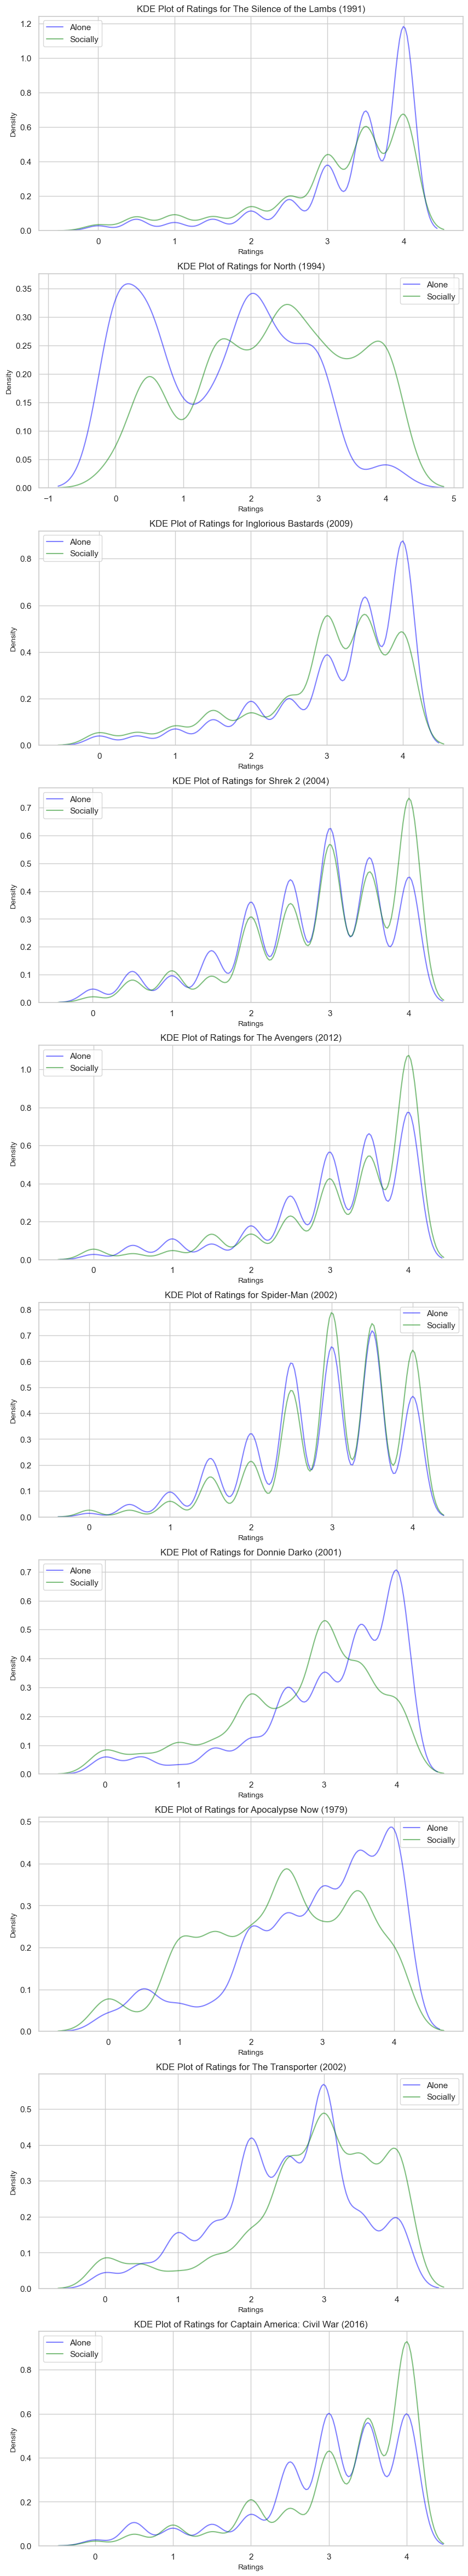

In [81]:
# Merging dfs 
merged_social_ratings_df = pd.concat([enjoys_alone_df, ratings_df], axis=1)

# Separating df for those who prefer watching alone and those who prefer watching socially
alone= merged_social_ratings_df[merged_social_ratings_df.iloc[:,0]==1]
socially= merged_social_ratings_df[merged_social_ratings_df.iloc[:,0]==0]

# Removing watcher type self-assessment column in each df
alone_ratings= alone.drop(alone.columns[0],axis=1).reset_index(drop=True)
socially_ratings= socially.drop(socially.columns[0],axis=1).reset_index(drop=True)

# Dropping NaN values
alone_ratings_cleaned = {}
# Iterating through each column (movie)
for column in alone_ratings.columns:
    # Dropping NaN values in the current column
    # Storing cleaned ratings in a dictionary
    alone_ratings_cleaned[column] = alone_ratings[column].dropna()

socially_ratings_cleaned={}
for column in socially_ratings.columns:
    socially_ratings_cleaned[column] = socially_ratings[column].dropna()

#print(alone_ratings_cleaned)
#print(socially_ratings_cleaned)

results=[]
significant=[]

# Iterating through each column (movie)
for movie in alone_ratings_cleaned.keys():
    
    # Extracting ratings 
    alone_ratings_vals = alone_ratings_cleaned[movie]
    socially_ratings_vals = socially_ratings_cleaned[movie]
    
    # Performing one-tailed Mann Whitney U test for each movie
    statistic, p_value = stats.mannwhitneyu(socially_ratings_vals,alone_ratings_vals)

    # Storing the results
    results.append((movie, statistic, p_value))

    # Identifying significant results
    if p_value < 0.005:
        significant.append((movie,statistic,p_value))

# Calculating proportion
num_significant = len(significant)
num_movies= len(results)
effect_proportion = (num_significant / num_movies)*100

# Printing proportion 
print(f"{effect_proportion}""% of movies (or "f"{num_significant}/{num_movies}"") exhibit a 'social watching' effect")

# Printing movies that had significant result
print("\nMovies that exhibit 'social watching' effect:\n")
for movie, statistic, p_value in significant:
    print('\t',f"{movie}: U statistic= {statistic}, p-value = {p_value}")

# Printing complete results
print('\nComplete Results:\n')
for movie, statistic, p_value in results:
    print('\t',f"{movie}: U statistic= {statistic}, p-value = {p_value}")

# Visualizations for significant movies

sns.set(style="whitegrid")

num_significant = len(significant)

fig, axes = plt.subplots(num_significant, 1, figsize=(10, 6 * num_significant))

for ax, (movie, _, _) in zip(axes, significant):
    alone_ratings_vals = alone_ratings_cleaned[movie]
    socially_ratings_vals = socially_ratings_cleaned[movie]

    sns.kdeplot(alone_ratings_vals, ax=ax, label='Alone', bw_adjust=0.5, fill=False, alpha=0.5, color='blue')
    sns.kdeplot(socially_ratings_vals, ax=ax, label='Socially', bw_adjust=0.5, fill=False, alpha=0.5, color='green')

    ax.set_title(f'KDE Plot of Ratings for {movie}', fontsize=12)
    ax.set_xlabel('Ratings', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.legend()
    ax.grid(True)


9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

KS Statistic: 0.15269080020897632, P-value: 6.379397182836346e-10
There is a significant difference in the ratings distribution of 'Home Alone (1990)' and 'Finding Nemo (2003)'.


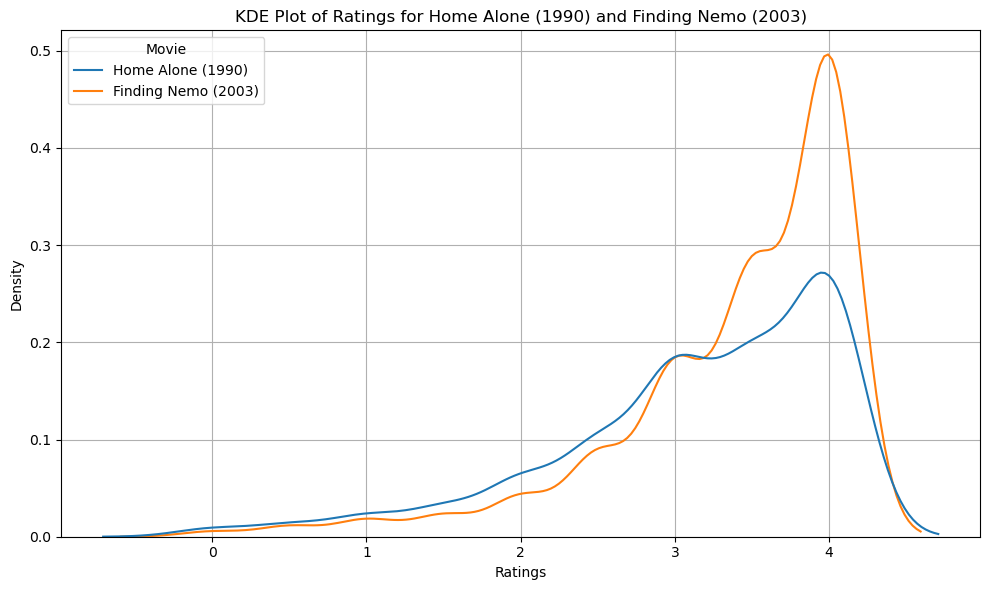

In [71]:
# Extracting ratings from df for each movie
home_alone_ratings = ratings_df['Home Alone (1990)']
finding_nemo_ratings = ratings_df['Finding Nemo (2003)']

# Dropping NaN values, row-wise removal
home_alone_ratings_cleaned= home_alone_ratings.dropna(axis=0,how='any')
finding_nemo_ratings_cleaned= finding_nemo_ratings.dropna(axis=0,how='any')

# Performing KS test
statistic, p_value = stats.kstest(home_alone_ratings_cleaned, finding_nemo_ratings_cleaned)

# Results
print(f"KS Statistic: {statistic}, P-value: {p_value}")

# Significance
if p_value < 0.005:
    print("There is a significant difference in the ratings distribution of 'Home Alone (1990)' and 'Finding Nemo (2003)'.")
else:
    print("There is no significant difference in the ratings distribution of 'Home Alone (1990)' and 'Finding Nemo (2003)'.")

# Visualizations

plot_data = pd.DataFrame({
    'Rating': pd.concat([home_alone_ratings_cleaned, finding_nemo_ratings_cleaned]),
    'Movie': ['Home Alone (1990)'] * len(home_alone_ratings_cleaned) + ['Finding Nemo (2003)'] * len(finding_nemo_ratings_cleaned)
})

plt.figure(figsize=(10, 6))
sns.kdeplot(data=plot_data, x='Rating', hue='Movie',fill=False)
plt.title('KDE Plot of Ratings for Home Alone (1990) and Finding Nemo (2003)')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

10) There are ratings on movies from several franchises ([‘Star Wars’
,
‘Harry Potter’
,
‘The Matrix’
,
‘Indiana
Jones’
,
‘Jurassic Park’
,
‘Pirates of the Caribbean’
,
‘Toy Story’
,
‘Batman’]) in this dataset. How many of these
are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks
featured in this question to identify the movies that are part of each franchise]

Results for Star Wars:

	Kruskal statistic= 193.51026675400544, 
	p-value = 6.940162236984522e-40

Results for Harry Potter:

	Kruskal statistic= 5.8739552218536755, 
	p-value = 0.11790622831256074

Results for The Matrix:

	Kruskal statistic= 40.32303905969196, 
	p-value = 1.7537323830838066e-09

Results for Indiana Jones:

	Kruskal statistic= 54.19395477406098, 
	p-value = 1.020118354785894e-11

Results for Jurassic Park:

	Kruskal statistic= 49.42733030275783, 
	p-value = 1.8492328391686058e-11

Results for Pirates of the Caribbean:

	Kruskal statistic= 6.660021086485515, 
	p-value = 0.035792727694248905

Results for Toy Story:

	Kruskal statistic= 23.496729938969775, 
	p-value = 7.902234665149812e-06

Results for Batman:

	Kruskal statistic= 84.65778425637279, 
	p-value = 4.1380499020034183e-19

Franchises of Inconsistent Quality:

	Star Wars
	The Matrix
	Indiana Jones
	Jurassic Park
	Toy Story
	Batman

Franchises of Consistent Quality:

	Harry Potter
	Pirates of the Caribbean




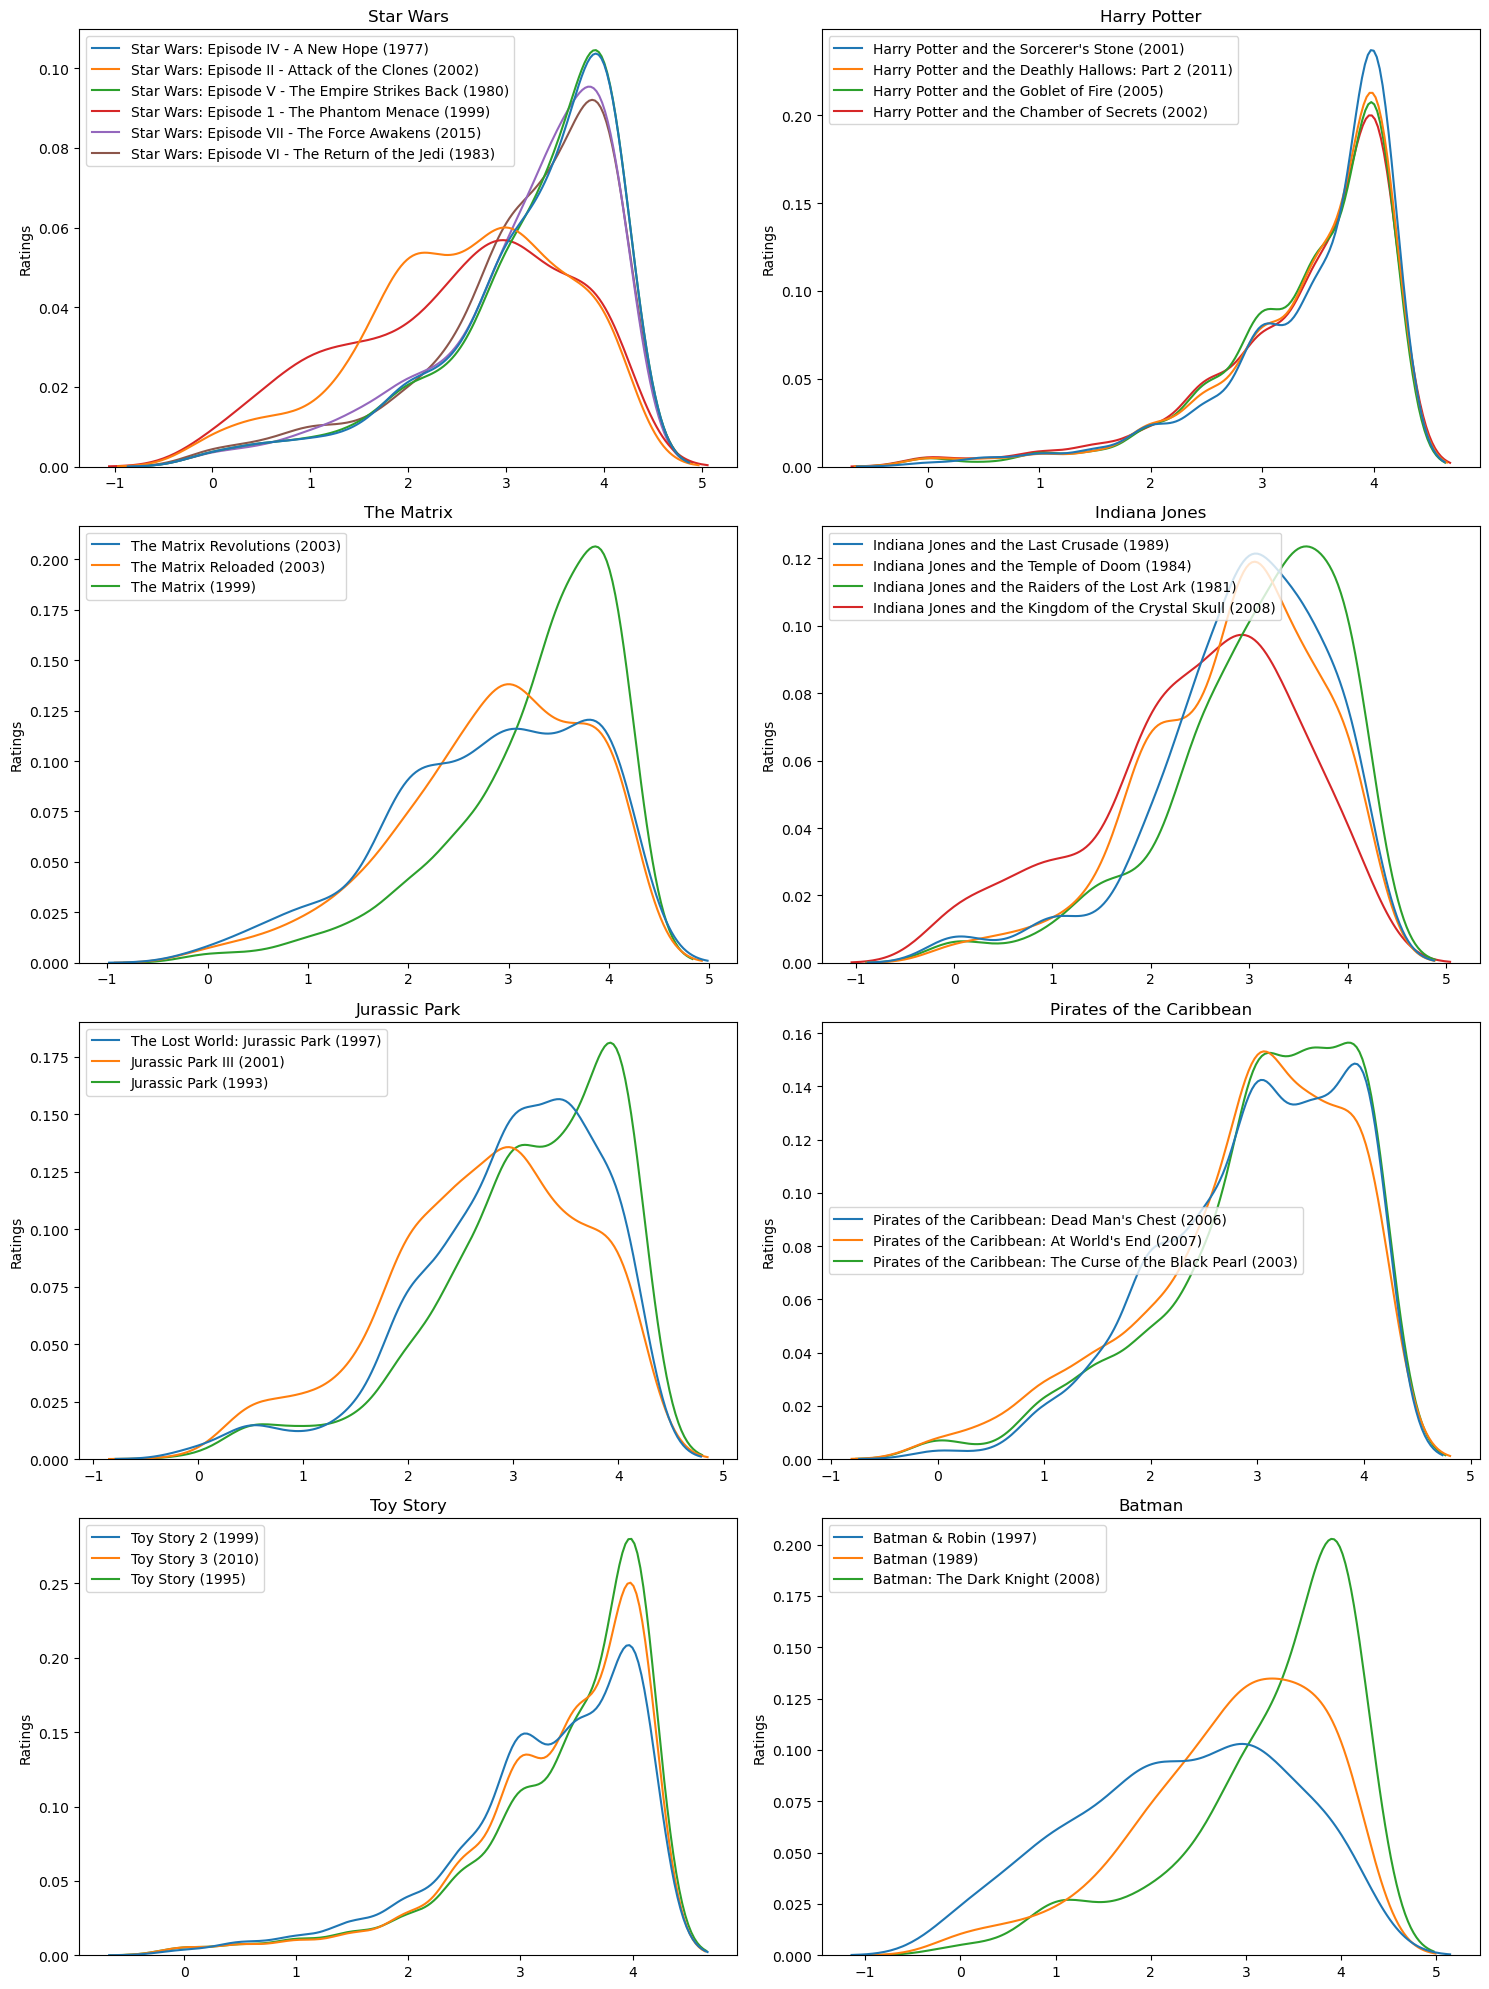

In [73]:
# List of franchises
franchises = [
    'Star Wars',
    'Harry Potter',
    'The Matrix',
    'Indiana Jones',
    'Jurassic Park',
    'Pirates of the Caribbean',
    'Toy Story',
    'Batman'
]

# Creating dictionary of dfs per franchise
franchise_columns = {franchise: ratings_df.filter(like=franchise, axis=1) for franchise in franchises}

# Display dfs for each franchise
#for franchise, df in franchise_columns.items():
#    print(f"{franchise} Ratings:")
#    display(df)
#    print("\n")

# Removing NaN values
cleaned_ratings = {}
for franchise, df in franchise_columns.items():
    cleaned_ratings[franchise] = {}
    # Row-wise removal
    df_cleaned = df.dropna(axis=0, how='any')
    for column in df_cleaned.columns:
        cleaned_ratings[franchise][column] = df_cleaned[column].values  

results = []
significant= []
consistent=[]

for franchise in franchises:
    
    # Getting movie ratings for specified franchise
    movies = cleaned_ratings[franchise]
        
    # Extracting movie names and corresponding rating lists
    movie_names = list(movies.keys())
    movie_ratings = [ratings for ratings in movies.values()]
    
    # Performing Kruskal-Wallis test among all movies in the franchise
    statistic, p_value = stats.kruskal(*movie_ratings)
        
    # Storing results
    results.append((franchise, movie_names, statistic, p_value))

# Results
for franchise, movie_names, statistic, p_value in results:
    print('Results for 'f"{franchise}"':\n')
    print(f"\tKruskal statistic= {statistic}, \n\tp-value = {p_value}\n")
    
    # Identifying significant results
    if p_value <0.005:
        significant.append((franchise, movie_names, statistic, p_value))
    else:
        consistent.append((franchise, movie_names, statistic, p_value))

print('Franchises of Inconsistent Quality:\n')
for franchise, movie_names, statistic, p_value in significant:
    print(f"\t{franchise}")

print('\nFranchises of Consistent Quality:\n')
for franchise, movie_names, statistic, p_value in consistent:
    print(f"\t{franchise}")

print('\n')

# Visualizations

# Assigning variables containing ratings of each movie within a franchise 
star_wars_cleaned = cleaned_ratings['Star Wars']
harry_potter_cleaned = cleaned_ratings['Harry Potter']
matrix_cleaned = cleaned_ratings['The Matrix']
indiana_jones_cleaned = cleaned_ratings['Indiana Jones']
jurassic_park_cleaned = cleaned_ratings['Jurassic Park']
pirates_caribbean_cleaned = cleaned_ratings['Pirates of the Caribbean']
toy_story_cleaned = cleaned_ratings['Toy Story']
batman_cleaned = cleaned_ratings['Batman']

cleaned_data = [
    (star_wars_cleaned, 'Star Wars'),
    (harry_potter_cleaned, 'Harry Potter'),
    (matrix_cleaned, 'The Matrix'),
    (indiana_jones_cleaned, 'Indiana Jones'),
    (jurassic_park_cleaned, 'Jurassic Park'),
    (pirates_caribbean_cleaned, 'Pirates of the Caribbean'),
    (toy_story_cleaned, 'Toy Story'),
    (batman_cleaned, 'Batman')
]

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, (data, title) in enumerate(cleaned_data):
    sns.kdeplot(ax=axes[i], data=data)
    axes[i].set_title(title)
    axes[i].set_ylabel('Ratings')

plt.tight_layout()
plt.show()

Extra Credit: Are movies rated differently by viewers who identify as being shy compared to viewers who identify as being outgoing?

In [31]:
# Extracting ratings for shy and outgoing viewers
shy= personality_df.filter(like='shy',axis=1)
outgoing= personality_df.filter(like='outgoing',axis=1)

# Extracting ratings for 'Grease (1978)'
grease_ratings= ratings_df['Grease (1978)']
grease_ratings=grease_ratings.dropna(axis=0,how='any')

# Merging the ratings with the shy and outgoing viewer data
grease_shy = pd.concat([grease_ratings, shy], axis=1).reset_index(drop=True)
grease_outgoing = pd.concat([grease_ratings, outgoing], axis=1).reset_index(drop=True)

# Removing watcher type self-assessment column in each DataFrame
# Assuming the self-assessment column is the second column after merging
shy_cleaned = grease_shy.drop(grease_shy.columns[1], axis=1).reset_index(drop=True)
outgoing_cleaned = grease_outgoing.drop(grease_outgoing.columns[1], axis=1).reset_index(drop=True)

# Row-wise removal of NaN elements
shy_cleaned = shy_cleaned.dropna(axis=0, how='any')
outgoing_cleaned = outgoing_cleaned.dropna(axis=0, how='any')

# Converting to arrays
shy_arr = shy_cleaned.values.flatten()  # Flatten to 1D array
outgoing_arr = outgoing_cleaned.values.flatten()  # Flatten to 1D array

# Performing Mann Whitney U test
statistic, p_value = stats.mannwhitneyu(shy_arr, outgoing_arr)

# Results
print(f"U Statistic: {statistic}, P-value: {p_value}")

# Significance
if p_value < 0.005:
    print("There is a significant difference in ratings for 'Grease (1978)' by shy viewers and outgoing viewers")
else:
    print("There is no significant difference in ratings for 'Grease (1978)' by shy viewers and outgoing viewers")


U Statistic: 212552.0, P-value: 1.0
There is no significant difference in ratings for 'Grease (1978)' by shy viewers and outgoing viewers
